### STA 4724: Homework 4 - Due Friday, Nov. 7 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Mustaeen Ahmed            

**Your ID:** 5530892

## Question 1: Hierarchical Clustering
Use USArrests dataset and perform hierarchical clustering on the states.

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

**(a)** Read the dataset.

In [89]:
import pandas as pd

df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**(b)** Using hierarchical clustering with Euclidean distance to cluster the states.

In [90]:
from scipy.cluster.hierarchy import linkage

X_link = linkage(df, method="complete", metric="euclidean")
X_link[:10]

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [48.        , 50.        , 10.86001842,  3.        ],
       [20.        , 29.        , 11.45643924,  2.        ]])

**(c)** Plot the dendrogram that shows the last 10 merged clusters.

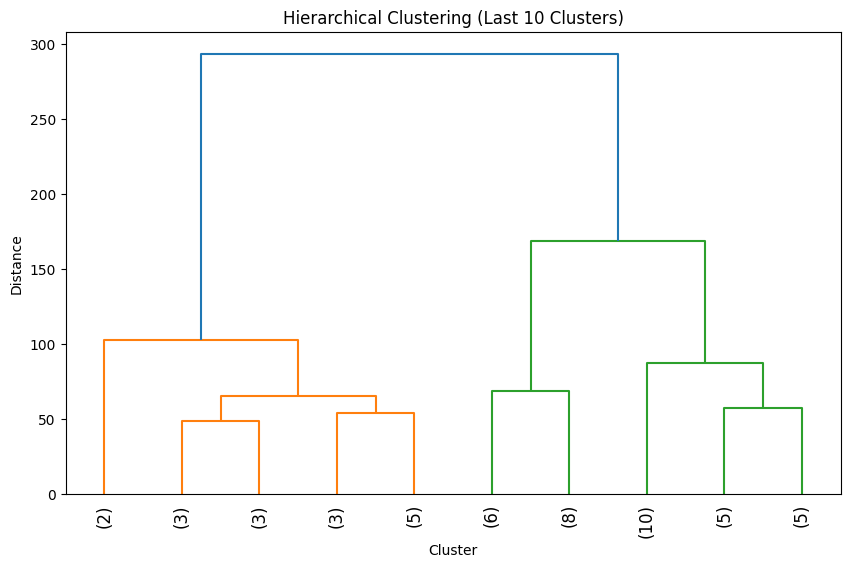

In [91]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 6))

dendrogram(X_link, truncate_mode="lastp", p=10, leaf_rotation=90)

plt.title("Hierarchical Clustering (Last 10 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Distance")

plt.show()

**(d)** Cut the dendrogram at a height that results in three distinct clusters. Which states belong to each of the three clusters?

Code a program to show your answer.

In [92]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(X_link, t=3, criterion="maxclust")

cluster_df = pd.DataFrame({
    'State': df.index,
    'Cluster': clusters
})

cluster_df = cluster_df.sort_values('Cluster')

for st in sorted(cluster_df['Cluster'].unique()):
    cluster_states = cluster_df[cluster_df['Cluster'] == st]['State'].tolist()
    print(f"\nCluster {st} [{len(cluster_states)} states]:")
    print(cluster_states)


Cluster 1 [16 states]:
['Alabama', 'Michigan', 'Maryland', 'New Mexico', 'Louisiana', 'New York', 'North Carolina', 'Illinois', 'Nevada', 'South Carolina', 'Mississippi', 'Florida', 'Delaware', 'California', 'Arizona', 'Alaska']

Cluster 2 [14 states]:
['Oregon', 'Oklahoma', 'Texas', 'Virginia', 'Washington', 'New Jersey', 'Tennessee', 'Rhode Island', 'Missouri', 'Wyoming', 'Arkansas', 'Colorado', 'Massachusetts', 'Georgia']

Cluster 3 [20 states]:
['West Virginia', 'Vermont', 'Utah', 'Connecticut', 'South Dakota', 'Hawaii', 'Idaho', 'Montana', 'Indiana', 'Iowa', 'Ohio', 'North Dakota', 'Kansas', 'Kentucky', 'Maine', 'New Hampshire', 'Minnesota', 'Nebraska', 'Wisconsin', 'Pennsylvania']


## Question 2: Decision Trees

Boston is a data set containing housing values in 506 suburbs of Boston. We would like to predict the house price using this dataset.

Here is the data descriptions: 

* crim: 
per capita crime rate by town.

* zn: 
proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: 
proportion of non-retail business acres per town.

* chas: 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: 
nitrogen oxides concentration (parts per 10 million).

* rm: 
average number of rooms per dwelling.

* age: 
proportion of owner-occupied units built prior to 1940.

* dis: 
weighted mean of distances to five Boston employment centres.

* rad: 
index of accessibility to radial highways.

* tax: 
full-value property-tax rate per $10,000.

* ptratio: 
pupil-teacher ratio by town.

* lstat: 
lower status of the population (percent).

* medv: 
median value of owner-occupied homes in $1000s.

Hint: When you build a decision tree to predict house prices, each left node ends up with several houses in it. The average price of these houses is the predicted price for this left node.  You can view this as a supervised clustering, and the prediction is the mean of each cluster. This is also known as Decision Tree Regressor.

For this question, you can either build the regular decision tree and then take the mean for each node by yourself. Or you can use the DecisionTreeRegressor function that we didn't cover in class.

**(a)** Load the dataset.

In [93]:
import pandas as pd

df = pd.read_csv("Boston.csv")

print(df.head())
print(df.columns)

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


**(b)** Use cross-validation to find the best parameters (max_depth, min_samples_leaf) for the decision tree.

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = df.drop("medv", axis=1)
y = df["medv"]

param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

grid.fit(X, y)

print("Best Parameters", grid.best_params_)
print("Best CV Score", grid.best_score_)

Best Parameters {'max_depth': 3, 'min_samples_leaf': 10}
Best CV Score -31.285605562589787


**(c)** Train the decision tree with the best parameters, then generate a Graphviz visualization of the tree.

Hint 1: You will generate a graphviz .dot file first. Install Graphviz or use online tool to make the actual plot, then you can save or screenshot the tree plot.

Hint 2: To insert a image in the Jupyter notebook, click *Edit -> Insert Image*.

In [95]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

bestDepth = grid.best_params_["max_depth"]
bestLeaf = grid.best_params_["min_samples_leaf"]

tree_model = DecisionTreeRegressor(
    max_depth=bestDepth,
    min_samples_leaf=bestLeaf,
    random_state=0
)

tree_model.fit(X, y)

export_graphviz(
    tree_model,
    out_file="boston_tree.dot",
    feature_names=X.columns,
    filled=True,
    rounded=True
)

Post the tree plot here: 

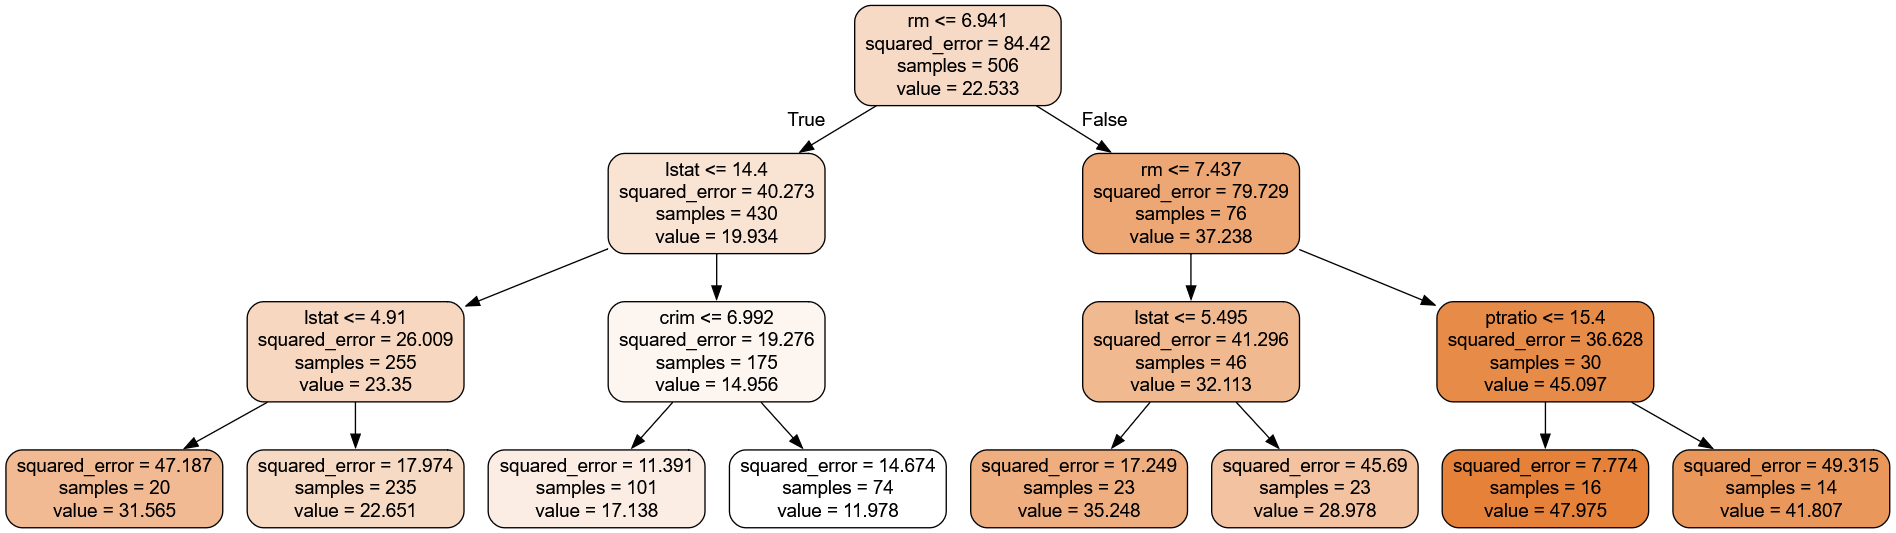

In [96]:
from IPython.display import Image, display

display(Image("graphviz.png"))